In [1]:
import os
from scipy import misc
import imageio
from IPython.display import Image
import numpy as np
import math
import matplotlib.pyplot as plt


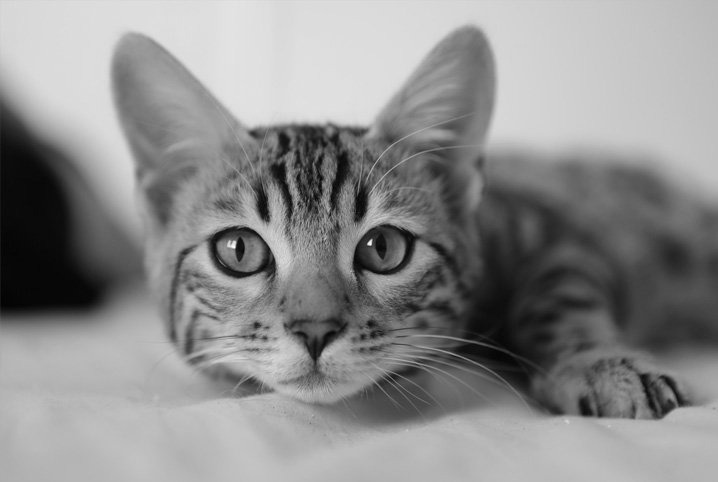

In [2]:
Image(filename='gato.jpg') 

In [3]:
im = imageio.imread('gato.bmp')

In [4]:
tx = np.array([ np.array([pixel[0] for pixel in line]) for line in im])


In [39]:
print('Dimensão da imagem em escala de cinza: ',tx.shape)
print('\n', tx.shape[0] * tx.shape[1] , "unidades de pixel")

Dimensão da imagem em escala de cinza:  (482, 718)

 346076 unidades de pixel


In [40]:
print(np.amax(tx))
print(np.amin(tx))
print('Concluímos então que é a escala de cinza de 0 a 255')

251
0


In [5]:
# corte de 8x8 na imagem
tx_sh_ct = tx[:8,:8]
tx_sh_ct

array([[207, 209, 211, 211, 210, 210, 210, 211],
       [212, 214, 216, 216, 215, 215, 215, 216],
       [212, 213, 215, 216, 215, 214, 215, 215],
       [210, 212, 214, 214, 213, 213, 213, 214],
       [212, 214, 216, 216, 215, 215, 215, 216],
       [212, 214, 216, 217, 216, 215, 216, 216],
       [211, 213, 215, 215, 215, 214, 214, 215],
       [212, 214, 216, 217, 216, 215, 215, 216]], dtype=uint8)

In [33]:
def make_c(N):
    C = np.zeros( (N, N) )
    for u in range(N):
        for v in range(N):
            if(u==0):
                C[u][v] = math.sqrt(1/float(N))
            else:
                C[u][v] = math.sqrt(2/float(N)) * math.cos( ((2*v + 1) * math.pi * u) / (2* float(N)) )
    return C

def transformar_imagem(imagem, C):
    return np.dot(np.dot(C, imagem), C.transpose())

def inverter_imagem(imagem, C):
    return np.dot(np.dot(C.transpose(), transformado), C)


In [7]:
make_c(4)

array([[ 0.5       ,  0.5       ,  0.5       ,  0.5       ],
       [ 0.65328148,  0.27059805, -0.27059805, -0.65328148],
       [ 0.5       , -0.5       , -0.5       ,  0.5       ],
       [ 0.27059805, -0.65328148,  0.65328148, -0.27059805]])

In [8]:
math.pi

3.141592653589793

In [36]:
cut = 450
shift_h = 100
shift_v = 0
tx_sh_ct = tx[shift_v:shift_v+cut,shift_h:shift_h+cut]

C = make_c(cut)

np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

transformado = np.dot(np.dot(C, tx_sh_ct), C.transpose())

print(transformado)

for ix, line in enumerate(transformado):
    for ix_2, pixel in enumerate(line):
        if(abs(pixel) < 200):
            transformado[ix][ix_2] = 0
        else:
            transformado[ix][ix_2] = int(transformado[ix][ix_2])
print('\n', transformado)

retornado = np.dot(np.dot(C.transpose(), transformado), C)
print('\n', retornado)

print('\n', tx_sh_ct-retornado)

[[63109.14  8592.12 -1490.74 ...     4.23     3.2     -3.67]
 [10161.79 -5434.7   -267.73 ...     1.46     1.98     2.96]
 [14566.94 -1564.47  -702.79 ...     0.51    -1.47     2.58]
 ...
 [   -2.47     2.15     4.35 ...     0.04    -1.04     0.12]
 [    1.36    -2.94    -3.11 ...     0.98     1.16    -2.82]
 [    0.46    -2.65    -0.81 ...     0.1      0.91     1.89]]

 [[63109.  8592. -1490. ...     0.     0.     0.]
 [10161. -5434.  -267. ...     0.     0.     0.]
 [14566. -1564.  -702. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]

 [[203.93 203.67 203.2  ... 209.58 209.63 209.66]
 [205.21 204.95 204.48 ... 209.52 209.57 209.59]
 [207.62 207.36 206.89 ... 209.4  209.43 209.45]
 ...
 [196.1  196.02 195.84 ... 170.68 169.99 169.64]
 [196.36 196.27 196.09 ... 170.42 169.71 169.35]
 [196.49 196.4  196.22 ... 170.3  169.58 169.22]]

 [[12.07 12.33 12.8  ..

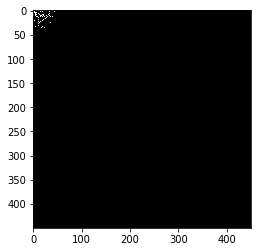

In [37]:
imgplot = plt.imshow(transformado, cmap='gray', vmin=0, vmax=255)


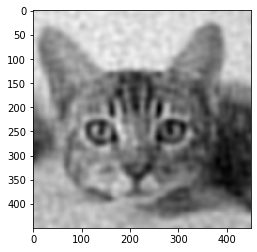

In [38]:
imgplot = plt.imshow(retornado, cmap='gray', vmin=0, vmax=255)


In [32]:
imageio.imwrite('gato_cortado.jpg', tx_sh_ct)
